# Ejercicios 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1.- Generar datos con corrimiento al rojo para el anillo en 2D

Usamos la función que se hizo en la segunda tarea para hacer la distribución de puntos en un anillo

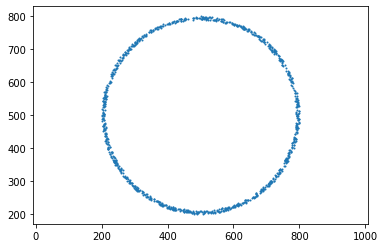

In [2]:

def Anillo(R0,Rf,N,L):
    phi = np.random.uniform(0,2*np.pi,N)
    costheta =np.random.uniform(-1,1,N)
    u = np.random.uniform(R0**2,Rf**2,N)

    theta = np.arccos( costheta )
    r =  u**(1/2)

    datos_anillo=np.zeros(shape=(N,2), dtype=float)
    datos_anillo[:,0] = r * np.cos( phi)+L/2
    datos_anillo[:,1] = r * np.sin( phi)+L/2
    return datos_anillo
R0=290
Rf=300
N=1000
L=1000

datos_anillo=Anillo(R0,Rf,N,L)

plt.scatter(datos_anillo[:,0],datos_anillo[:,1], s=1)
plt.figsize=(40,40)
plt.axis('equal')
plt.show()


Se define una función que modifica la posición de cada punto a $\mathbf{r}=(x, y+v\cdot\hat{i})$ donde la velocidad está en la dirección de la partícula más cercana y tiene magnitud 150/(distancia mínima).


In [3]:
def Corrimiento(N,r, Lmax):
    redshift=np.zeros(shape=(N,2), dtype=float)
    for i in range(N):
        dist_min=np.sqrt(2)*Lmax
        for j in range(N):   
            dr = r[j]-r[i]
            if ((abs(dr[0])<np.sqrt(2)*Lmax) or (abs(dr[1])<np.sqrt(2)*Lmax)) and (all(dr>0.00)) :
                Dr = np.sqrt(sum(dr*dr))    
                if Dr< dist_min:
                    dist_min=Dr
                    vel=(150/dist_min)*dr
        redshift[i]=[r[i,0],r[i,1]+np.dot([1,0],vel)]
        

    return redshift

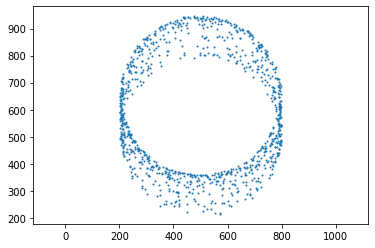

In [4]:
datos_nuevos=Corrimiento(1000,datos_anillo,100)
plt.scatter(datos_nuevos[:,0],datos_nuevos[:,1], s=1)
plt.figsize=(40,40)
plt.axis('equal')
plt.show()

## 2.- Modificar el código de la función de correlación con estimador de Landy-Szalay para que sea anisotrópico (2D) y graficarla


Usé las funciones que calculaban los histogramas del segundo set de ejercicios para hacer unas nuevas que calculen la distancia y las componentes x,y de la posición de cada partícula con respecto a la partícula "pivote"

In [5]:
def DD_aniso(N,L,r,num_bins, Lmax):
    rango=Lmax/num_bins
    cuentas=np.zeros(shape=(2*num_bins,2*num_bins), dtype=float)
    for i in range(N):
        for j in range(i+1,N):              
            dr = r[j]-r[i]
            Dr = np.sqrt(sum(dr*dr))    
            if Dr<Lmax:
                mu=dr[1]/Dr
                X=Dr*mu
                Y=Dr*mu*(dr[0]/dr[1])
                bin_number_x = int(X // rango) 
                bin_number_y = int(Y // rango)
                cuentas[int(bin_number_x + num_bins), int(bin_number_y + num_bins)] += 1           

    cuentas_norm=2*np.array(cuentas)/ (N*(N-1))
    return cuentas_norm


def DR_aniso(N,M,L,r,d,num_bins,Lmax):
    rango=Lmax/num_bins
    cuentas=np.zeros(shape=(2*num_bins,2*num_bins), dtype=float)
    for i in range(N):
        for j in range(M):              
            dr = r[i]-d[j]
            Dr = np.sqrt(sum(dr*dr))
            if Dr<Lmax:
                mu=dr[1]/Dr
                X=Dr*mu
                Y=Dr*mu*(dr[0]/dr[1])
                bin_number_x = int(X // rango) 
                bin_number_y = int(Y // rango)
                cuentas[int(bin_number_x + num_bins), int(bin_number_y + num_bins)] += 1 
    cuentas_norm=np.array(cuentas)/ (N*M)
    return cuentas_norm


Para calcular el estimador necesitamos datos aleatorios, así que usé la función que produce una distribución aleatoria de la segunda tarea

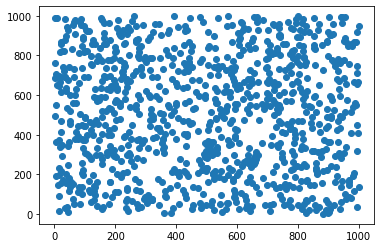

In [6]:

def Dat_random(N,L):
    datos_random= np.zeros(shape=(N,2), dtype=float)
    datos_random[:,0]=np.random.uniform(0.0,L ,N)
    datos_random[:,1] = np.random.uniform(0.0,L ,N)
    return datos_random
N=1000
L=1000

datos_random=Dat_random(N,L)
ax = plt.axes()
ax.scatter(datos_random[:,0], datos_random[:,1]);
plt.show()



Calculamos los histogramas y los graficamos 

In [7]:
Lmax=1000
num_bins=10
RR=DD_aniso(1000,1000,datos_random,num_bins,Lmax)
DR_anillo_rs=DR_aniso(1000,1000,1000,datos_random,datos_nuevos,num_bins,Lmax)
DD_anillo_rs=DD_aniso(1000,1000,datos_nuevos,num_bins,Lmax)

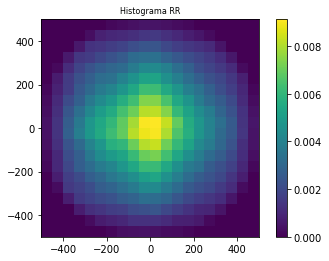

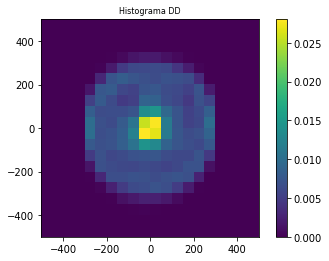

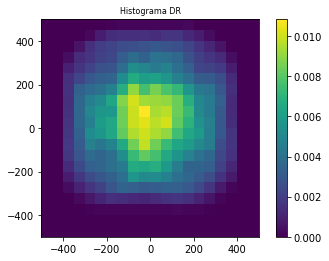

In [8]:
fig, ax = plt.subplots()
im = ax.imshow(RR,extent=[-Lmax/2,Lmax/2,-Lmax/2,Lmax/2])
plt.colorbar(im)
plt.title('Histograma RR', fontsize=8)
plt.show()

fig, ax = plt.subplots()
im = ax.imshow(DD_anillo_rs,extent=[-Lmax/2,Lmax/2,-Lmax/2,Lmax/2])
plt.colorbar(im)
plt.title('Histograma DD', fontsize=8)
plt.show()

fig, ax = plt.subplots()
im = ax.imshow(DR_anillo_rs,extent=[-Lmax/2,Lmax/2,-Lmax/2,Lmax/2])
plt.colorbar(im)
plt.title('Histograma DR', fontsize=8)
plt.show()


Calculamos y graficamos el estimador de Landy-Szalay

c:\python36-32\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


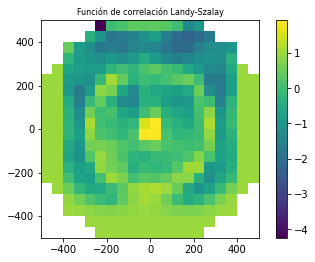

In [9]:

FC_Landy=np.divide(DD_anillo_rs,RR)-2*np.divide(DR_anillo_rs,RR)+1



fig, ax = plt.subplots()
im = ax.imshow(FC_Landy,extent=[-Lmax/2,Lmax/2,-Lmax/2,Lmax/2])
plt.colorbar(im)
plt.title('Función de correlación Landy-Szalay', fontsize=8)
plt.show()


Quité los valores que tienen nan por dividir entre cero con np.nan_to_num y grafiqué

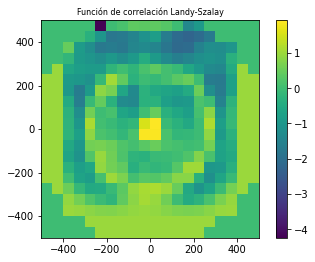

In [10]:
Landy_nonan=np.nan_to_num(FC_Landy)
plt.imshow(Landy_nonan,extent=[-Lmax/2,Lmax/2,-Lmax/2,Lmax/2])
plt.colorbar()
plt.title('Función de correlación Landy-Szalay', fontsize=8)
plt.show()
